## Min & Max Temperature - Plot 

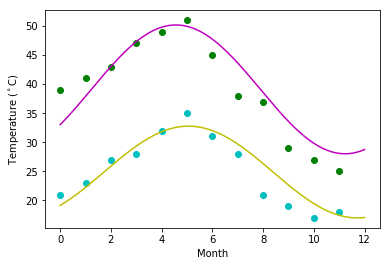

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

tmax = np.array([39,41,43,47,49,51,45,38,37,29,27,25])
tmin = np.array([21,23,27,28,32,35,31,28,21,19,17,18])

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))
months = np.arange(12)
res_max, cov_max = optimize.curve_fit(yearly_temps, months,tmax, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,tmin, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, tmax, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, tmin, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Matplotlib 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic.isna().sum() 

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

([<matplotlib.patches.Wedge at 0x1dba0ae8668>,
 [Text(0.480837,0.989341,'Female'), Text(-0.480837,-0.989341,'Male')],
 [Text(0.262275,0.539641,'35.6%'), Text(-0.262275,-0.539641,'64.4%')])

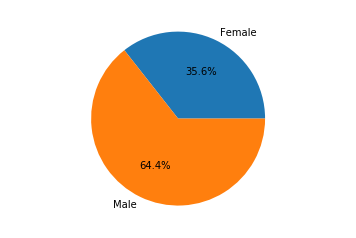

In [11]:
Female = len(titanic[titanic.sex=='female'])
Male = len(titanic[titanic.sex=='male'])
fig = plt.figure()
chart = fig.add_subplot(1,1,1)
chart.axis('equal')
chart.pie([Female, Male],labels=['Female','Male'],autopct='%1.1f%%')

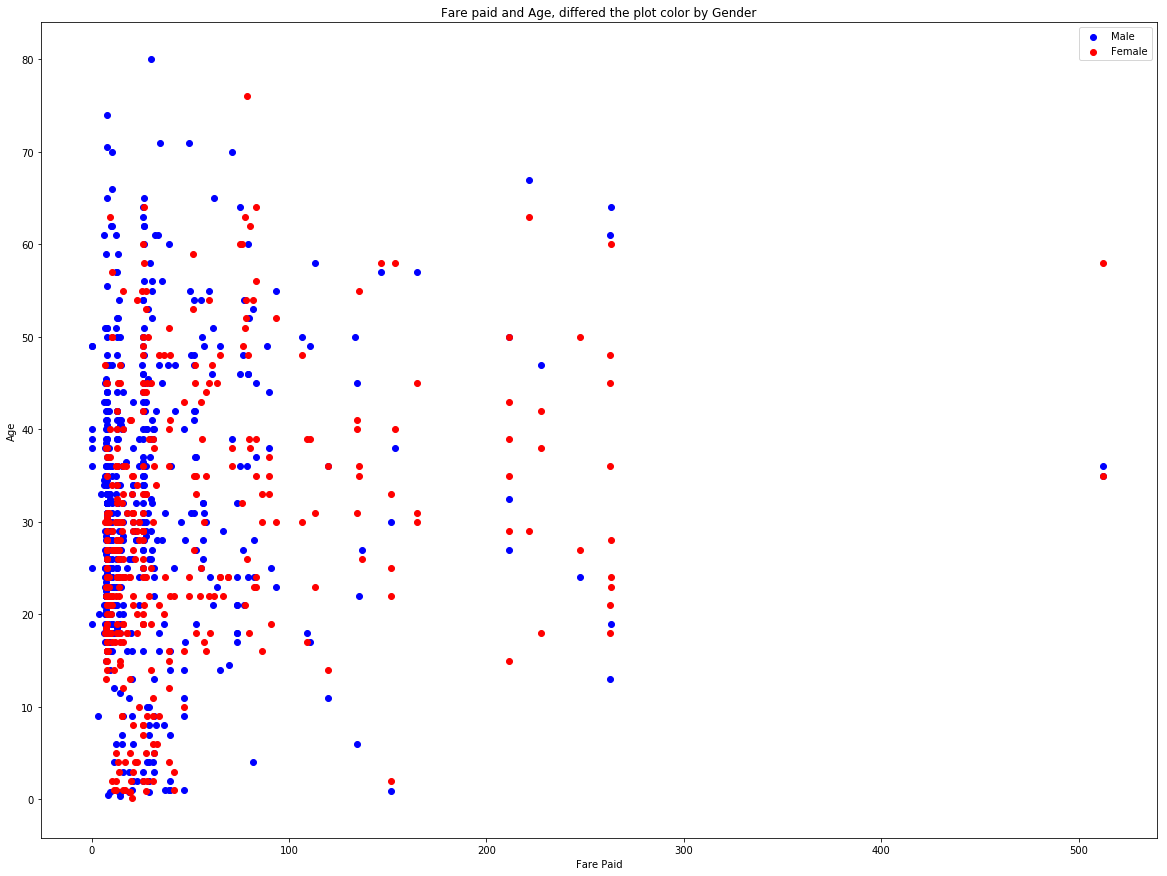

In [12]:
cond = titanic.sex == 'male'
subset_a = titanic[cond]
subset_b = titanic[~cond]
plt.figure(figsize=(20, 15))
plt.scatter(subset_a.fare, subset_a.age, c='b', label='Male')
plt.scatter(subset_b.fare, subset_b.age, c='r', label='Female') 
plt.title("Fare paid and Age, differed the plot color by Gender")
plt.xlabel("Fare Paid")
plt.ylabel("Age")
plt.legend()